Instead of experimenting with the epoch-variable to optimize the neural network or to avoid overfitting, I implement this feature in the neural network:
- Dropout-layers
- EarlyStop

## Uploading data, X-y variables, Train/test/validation split

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

import tensorflow as tf
import keras
from keras import layers

from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [2]:
# upload data
df = pd.read_csv("balanced_data.csv")

In [3]:
# leave out the target variable! (dependent variable)
X = df[['Year', 'Mileage', 'City', 'State', 'Make', 'Model']]

# have only the target variable here (dependent variable)
y = df['Price']

In [4]:
# first, train/test split => 70% for training, 30% for other purposes (temp)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=101)

# now, split the 30% for other purposes by 50% (resulting in 2 x 15%)
# so finally, we have:
# 70% for training
# 15% for testing
# 15% for validation
# => 70 + 15 +15 = 100%
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=101)

## Development of the neural network

In [5]:
# Number of input features (after dropping the target column)
variable_amount = len(X.columns)

# ModelCheckpoint to save the best model based on validation loss
mc = ModelCheckpoint('best_model_regression1.keras', monitor='val_loss', mode='min', save_best_only=True)

# EarlyStopping to stop training when validation loss doesn't improve
es = EarlyStopping(monitor='val_loss', mode='min', patience=20, verbose=1, restore_best_weights=True)

# Combine callbacks into a list
callback_list = [mc, es]

# Define Sequential neural network model with Dropout layers
model = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(variable_amount,)),
        layers.Dense(16, activation="relu", kernel_regularizer=keras.regularizers.l1(l1=0.1)),
        layers.Dropout(0.1),
        layers.Dense(8, activation="relu"),
        layers.Dense(1)  # Output layer for regression (1 node, no activation function)
    ]
)

# Compile the model with Adam optimizer and Mean Squared Error loss function
model.compile(optimizer='adam', loss='mse')

# Print out the summary of the model
model.summary()

# Train the model with the dataset and apply the callbacks
history = model.fit(x=X_train, y=y_train, epochs=800, validation_data=(X_val, y_val), callbacks=callback_list)




# for understanding better the concept
# During training, the EarlyStopping callback 
# will monitor the validation loss. If the validation loss 
# does not improve for 20 consecutive epochs (as set by patience), 
# training will be stopped early. The model will then restore the 
# best weights observed during the training process.

# Prevents Overfitting
# Saves Time
# Optimal Model

# Thanks to ChatGPT for explaining this!
# okay, let's start to see whether we are able
# to get better result with this modification

/Users/emiliiazemskova/anaconda3/lib/python3.10/site-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 6)              │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 269 (1.05 KB)

 Non-trainable params: 12 (48.00 B)

Epoch 1/800
4596/4596 ━━━━━━━━━━━━━━━━━━━━ 3s 455us/step - loss: 228300672.0000 - val_loss: 33138504.0000
Epoch 2/800
4596/4596 ━━━━━━━━━━━━━━━━━━━━ 2s 483us/step - loss: 35926072.0000 - val_loss: 32989258.0000
Epoch 3/800
4596/4596 ━━━━━━━━━━━━━━━━━━━━ 2s 455us/step - loss: 35915684.0000 - val_loss: 32984306.0000
Epoch 4/800
4596/4596 ━━━━━━━━━━━━━━━━━━━━ 2s 461us/step - loss: 35889420.0000 - val_loss: 33048708.0000
Epoch 5/800
4596/4596 ━━━━━━━━━━━━━━━━━━━━ 2s 431us/step - loss: 36088120.0000 - val_loss: 33007970.0000
Epoch 6/800
4596/4596 ━━━━━━━━━━━━━━━━━━━━ 2s 469us/step - loss: 36268420.0000 - val_loss: 33001952.0000
Epoch 7/800
4596/4596 ━━━━━━━━━━━━━━━━━━━━ 2s 447us/step - loss: 36269980.0000 - val_loss: 33030458.0000
Epoch 8/800
4596/4596 ━━━━━━━━━━━━━━━━━━━━ 2s 426us/step - loss: 36012312.0000 - val_loss: 32975956.0000
Epoch 9/800
4596/4596 ━━━━━━━━━━━━━━━━━━━━ 2s 428us/step - loss: 35986412.0000 - val_loss: 32997940.0000
Epoch 10/800
4596/4596 ━━━━━━━━━━━━━━━━━━━━ 2s 437us/s

## Error metrics

<Axes: >

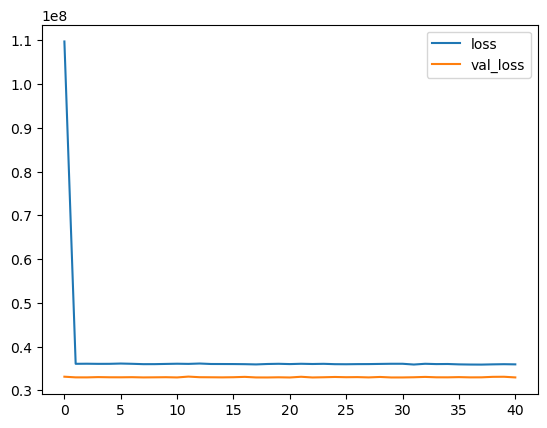

In [6]:
# training and validation loss over epochs 
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

# EarlyStop helped the model to not overfit

In [7]:
# compare the final model loss/evaluation values
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

# original ANN regression had worse results
# Test data evaluation: 34666752.0
# Train data evaluation: 34318508.0

# new techniques helped to improve it

Test data evaluation:
33485728.0

Train data evaluation:
33125560.0


In [8]:
test_predictions = model.predict(X_test)

# reshape the data for easier comparison table
test_predictions = pd.Series(test_predictions.reshape(len(y_test),))
pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

# print the comparison table - true values vs. model predicted values
# we can nicely see here how far off our model is in some cases
pred_df

# insights:
# predictions are relatively close to the true values
# In some cases, the predictions are significantly lower, 
# and in others, they are higher

# but the improved model seems to have a smaller error margin on average

985/985 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step


,Test True Y,Model Predictions
0,24875,19537.585938
1,25989,19835.523438
2,17500,19980.851562
3,18350,21171.177734
4,20989,17553.052734
...,...,...
31506,14000,17508.099609
31507,17290,21561.906250
31508,19950,19358.714844
31509,15500,21249.205078


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

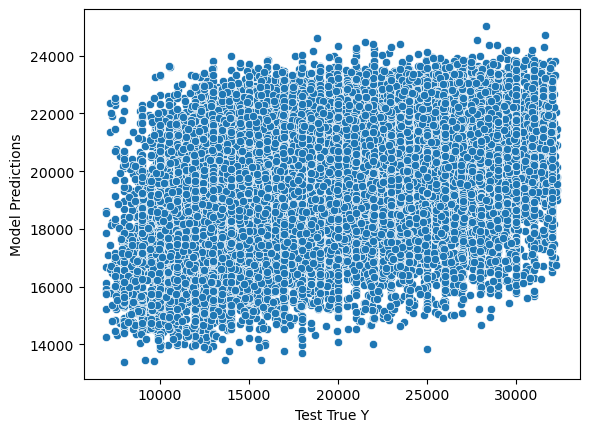

In [9]:
# these values follow a linear line = good predictions
# we basically compare the predicted values 
# to true test values and see the differences
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

# the same picture as in the original model

In [10]:
# MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2), "$")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2), "$^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2), "$")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

# Explained Variance Score => 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
# high variance score = model is a good fit for the data 
# low variance score = model is not a good fit for the data
# the higher the score, the model is more able to explain the variation in the data
# if score is low, we might need more and better data
print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))


# MAE
# Lower is better
# Original is 4841.92 $
# Now is 4861.12 $
# almost the same result

# MSE
# Lower is better
# Original is 34666769.92 $^2
# Now is 33485725.76 $^2
# almost the same

# RMSE
# Lower is better
# Original is 5887.85 $
# Now is 5786.69 $
# a little difference

# R-squared
# Closer to 1 is better
# Original is 0.07
# Now is 0.1
# here we have a bit better results


# Explained variance score
# Closer to 1 is better
# Original is 0.1
# Now is 0.1

# To sum up,
# suprisingly, metrics did not show a significant difference in results
# even though I used to technics such as
# Dropout-layers and EarlyStop

MAE
4861.12 $

MSE
33485725.76 $^2

RMSE:
5786.69 $

R-squared:
0.1

Explained variance score:
0.1


/var/folders/lj/tcwl5glj0blfftjn4df0129r0000gn/T/ipykernel_28394/220905741.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - test_predictions))


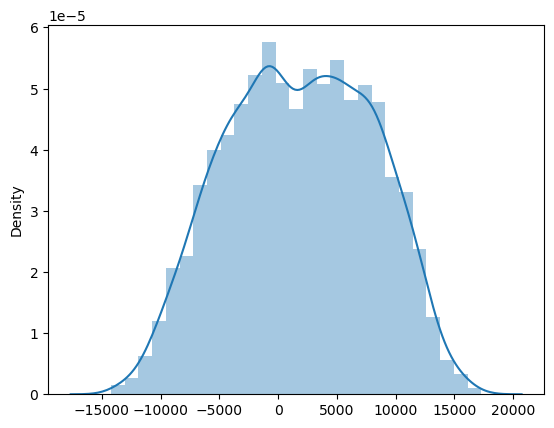

In [11]:
# if the prediction distribution are far from normal distribution
# then the model is not probably good enough
# distplot is deprecating in future pandas-version
# unfortunately, there's no exact alternative to do this plot at the moment
sns.distplot((y_test - test_predictions))
plt.show()
plt.close()

# and distribution graph is worse here than in the original one